In [5]:
import pandas as pd

# Load your merged data
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'  # Path to your merged data CSV file

def analyze_specific_products(data, product_desc, buyer_country):
    # Filter data for the specific product and buyer country
    specific_product_sales = data[(data['L3Desc'].str.contains(product_desc, case=False, na=False)) & (data['PartnerName'] == buyer_country)]
    return specific_product_sales.groupby(['Reporter'])['Reporter_Total_Exports'].sum().reset_index()

# Load the merged data
data = pd.read_csv(file_path)

# Analyzing fish sales to Turkey

fish_sales_to_turkey = analyze_specific_products(data, 'Meat and meat preparations', 'Turkey')

# Display the result as a DataFrame
fish_sales_to_turkey


,Reporter,Reporter_Total_Exports
0,C004,1.786510e+05
1,C008,1.809980e+05
2,C012,8.700700e+05
3,C024,1.193466e+05
4,C031,1.690280e+06
...,...,...
125,C892,1.481488e+08
126,C894,2.087298e+06
127,ROW,4.288360e+08
128,U918,2.476815e+10


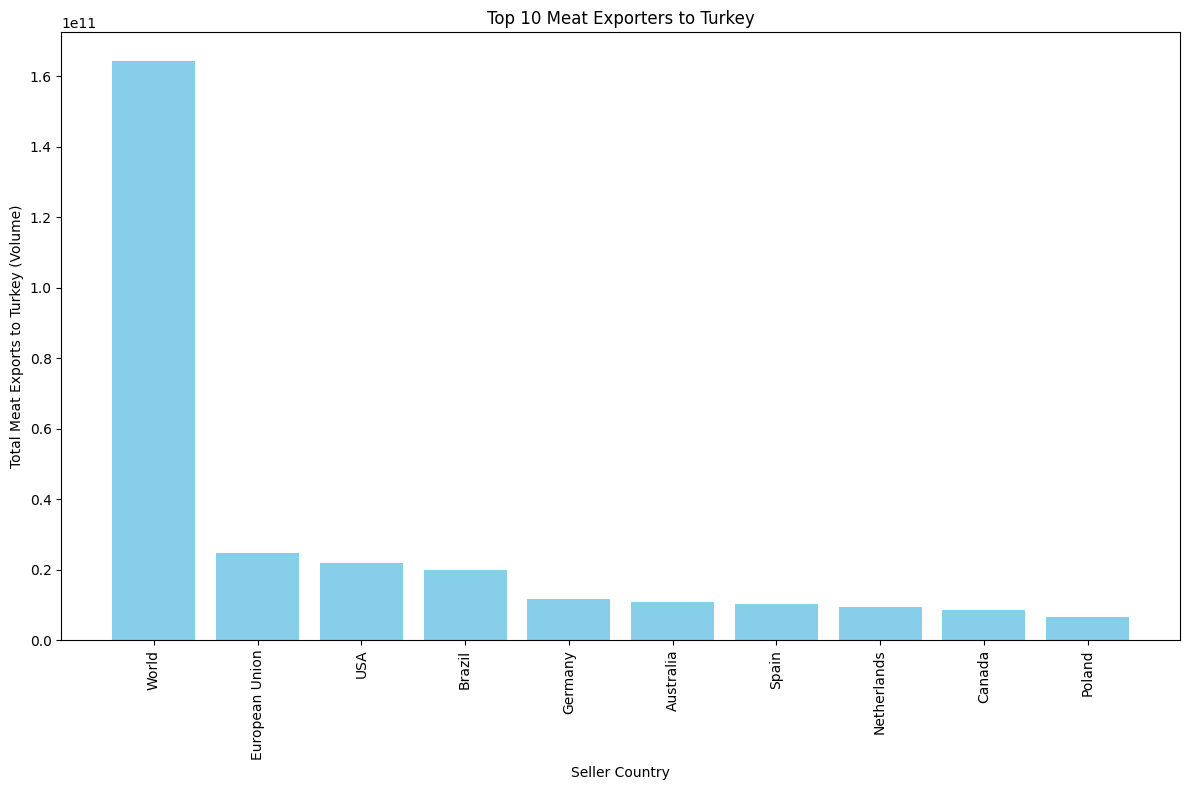

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your merged data
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'  # Path to your merged data CSV file

def analyze_specific_products(data, product_desc, buyer_country):
    # Filter data for the specific product and buyer country
    specific_product_sales = data[(data['L3Desc'].str.contains(product_desc, case=False, na=False)) & (data['PartnerName'] == buyer_country)]
    # Group by ReporterName for a more descriptive analysis
    return specific_product_sales.groupby(['ReporterName'])['Reporter_Total_Exports'].sum().reset_index()

# Load the merged data
data = pd.read_csv(file_path)

# Analyzing meat and meat preparations sales to Turkey
meat_sales_to_turkey = analyze_specific_products(data, 'Meat and meat preparations', 'Turkey')

# Sort data to find top 10 seller countries by export volume
meat_sales_to_turkey = meat_sales_to_turkey.sort_values(by='Reporter_Total_Exports', ascending=False).head(10)

# Plotting the results
plt.figure(figsize=(12, 8))  # Larger figure size
plt.bar(meat_sales_to_turkey['ReporterName'], meat_sales_to_turkey['Reporter_Total_Exports'], color='skyblue')
plt.xlabel('Seller Country')
plt.ylabel('Total Meat Exports to Turkey (Volume)')
plt.title('Top 10 Meat Exporters to Turkey')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump, load
from sklearn.impute import SimpleImputer

# Load the dataset and limit to first 10,000 rows
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'
data = pd.read_csv(file_path).head(50000)

# Define numerical and categorical columns
numerical_cols = [
    'Reporter_Total_Imports', 'Reporter_Total_Exports',
    'Partner_Total_Imports', 'Partner_Total_Exports', 'Year'
]
categorical_cols = ['L3Desc', 'ReporterName', 'PartnerName']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col + '_Encoded'] = label_encoders[col].fit_transform(data[col])

# Combine numerical and encoded categorical columns for features
encoded_categorical_cols = [col + '_Encoded' for col in categorical_cols]
features = numerical_cols + encoded_categorical_cols

# Feature Scaling
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Define feature matrix (X) and target variable (y)
X = data[features]
y = data['PartnerName_Encoded']  # Use the correct encoded column as the target

# Check the data type of the target variable
print("Target variable data type:", y.dtype)
# Ensure y is integer type
if y.dtype != 'int':
    y = y.astype(int)
    print("Target variable converted to integer type.")

# Check unique values of the target to confirm it's categorical
print("Unique values in target variable:", y.unique())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Save the trained model
model_path = 'trade_model_rf.joblib'
dump(model, model_path)
print("Model saved to", model_path)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))


Target variable data type: float64
Target variable converted to integer type.
Unique values in target variable: [-1  0  1  2]
Model saved to trade_model_rf.joblib
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2009
           0       1.00      1.00      1.00      5901
           1       1.00      1.00      1.00      1940
           2       1.00      1.00      1.00       150

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

